From https://github.com/jrobchin/Computer-Vision-Basics-with-Python-Keras-and-OpenCV/blob/master/notebook.ipynb

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [8]:
def mask_array(array, imask):
    if array.shape[:2] != imask.shape:
        raise Exception("Shapes of input and imask are incompatible")
    output = np.zeros_like(array, dtype=np.uint8)
    for i, row in enumerate(imask):
        output[i, row] = array[i, row]
    return output

In [36]:
def get_newest_frame(cap_device):
    #Purge the buffer
    for i in range(10): #Annoyingly arbitrary constant
        cap_device.grab()

    # Read first frame
    ok, frame = cap_device.read()
    if not ok:
        print("Cannot read video")
    
    return frame

In [53]:
def cv_to_plot(im):
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

In [9]:
video = cv2.VideoCapture(0)
if not video.isOpened():
    print("Could not open video")

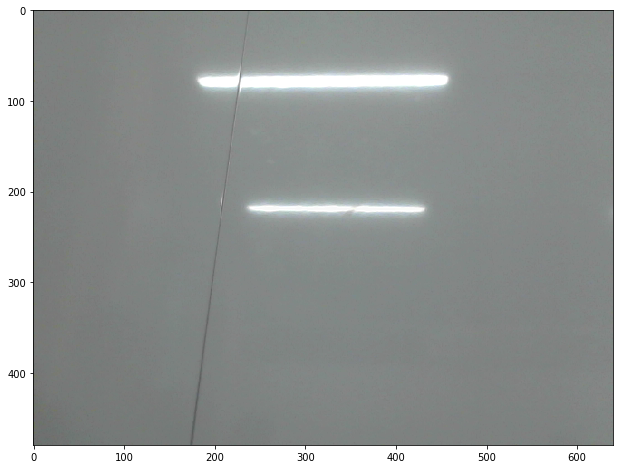

In [67]:
frame = get_newest_frame(video)
# Use the first frame as an initial background frame
bg = frame.copy()

plt.figure(figsize=(15, 8))
plt.imshow(cv2.cvtColor(bg, cv2.COLOR_BGR2RGB))

In [34]:
# Kernel for erosion and dilation of masks
kernel = np.ones((3,3),np.uint8)

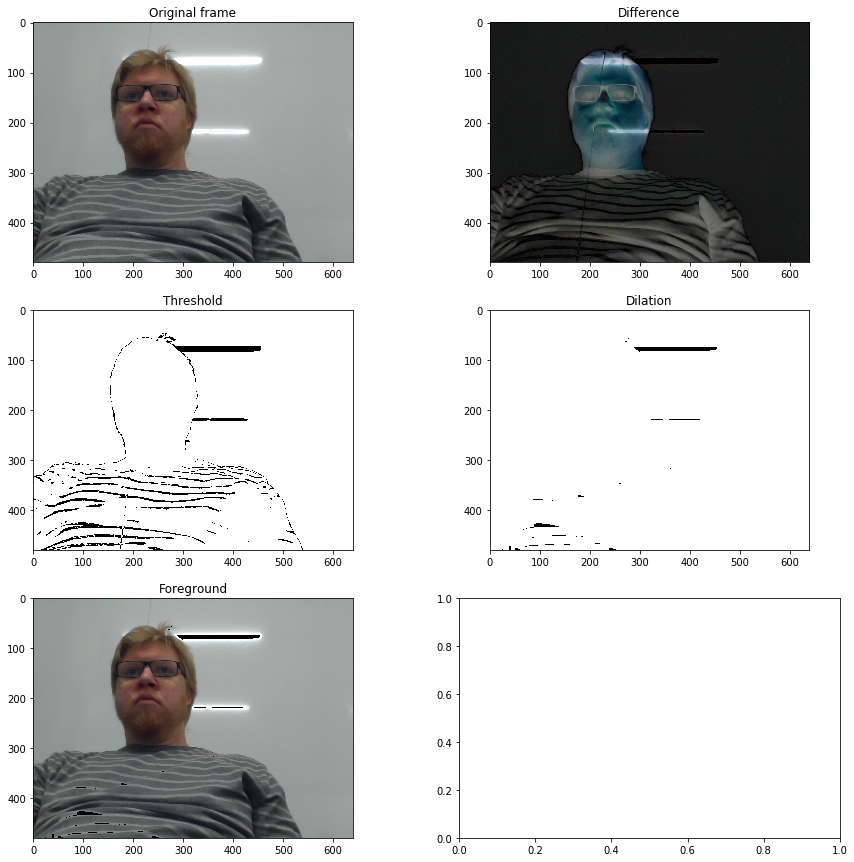

In [68]:
frame = get_newest_frame(video)

# First find the absolute difference between the two images
diff = cv2.absdiff(bg, frame)
mask = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)

# Threshold the mask
th, thresh = cv2.threshold(mask, 10, 255, cv2.THRESH_BINARY)

# Opening, closing and dilation
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
img_dilation = cv2.dilate(closing, kernel, iterations=2)

# Get mask indexes
imask = img_dilation > 0
# Get foreground from mask
foreground = mask_array(frame, imask)

# Display result
#cv2.imshow("frame", frame)
# Display diff
#cv2.imshow("diff", diff)
# Display thresh
#cv2.imshow("thresh", thresh)
# Display mask
#cv2.imshow("img_dilation", img_dilation)
# Display foreground
#cv2.imshow("foreground", foreground)

f, subs = plt.subplots(3, 2, figsize=(15, 15))
subs = subs.ravel()

subs[0].imshow(cv_to_plot(frame))
subs[0].set_title("Original frame")

subs[1].imshow(cv_to_plot(diff))
subs[1].set_title("Difference")

subs[2].imshow(thresh, cmap='gray')
subs[2].set_title("Threshold")

subs[3].imshow(img_dilation, cmap='gray')
subs[3].set_title("Dilation")

subs[4].imshow(cv_to_plot(foreground))
subs[4].set_title("Foreground")

plt.show()

In [69]:
def setup_tracker(ttype):
    tracker_types = ['BOOSTING', 'MIL', 'KCF', 'TLD', 'MEDIANFLOW', 'GOTURN']
    tracker_type = tracker_types[ttype]

    if int(minor_ver) < 3:
        tracker = cv2.Tracker_create(tracker_type)
    else:
        if tracker_type == 'BOOSTING':
            tracker = cv2.TrackerBoosting_create()
        if tracker_type == 'MIL':
            tracker = cv2.TrackerMIL_create()
        if tracker_type == 'KCF':
            tracker = cv2.TrackerKCF_create()
        if tracker_type == 'TLD':
            tracker = cv2.TrackerTLD_create()
        if tracker_type == 'MEDIANFLOW':
            tracker = cv2.TrackerMedianFlow_create()
        if tracker_type == 'GOTURN':
            tracker = cv2.TrackerGOTURN_create()
    
    return tracker